# Diabetes Prediction - Random Forest

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv("kaggle_diabetes.csv")

# Exploring Dataset

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.shape

(2000, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
df.rename(columns={"DiabetesPedigreeFunction":'DPF'})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


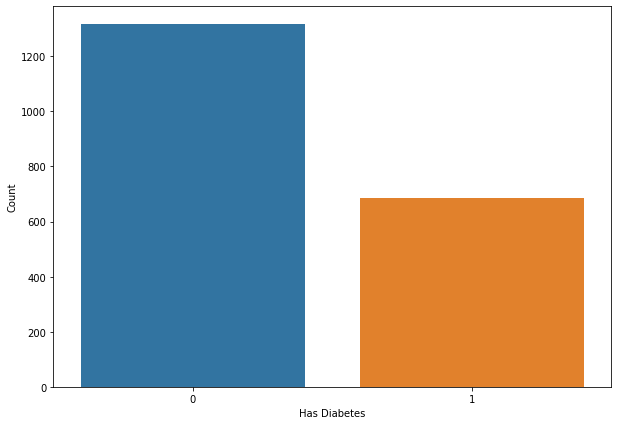

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

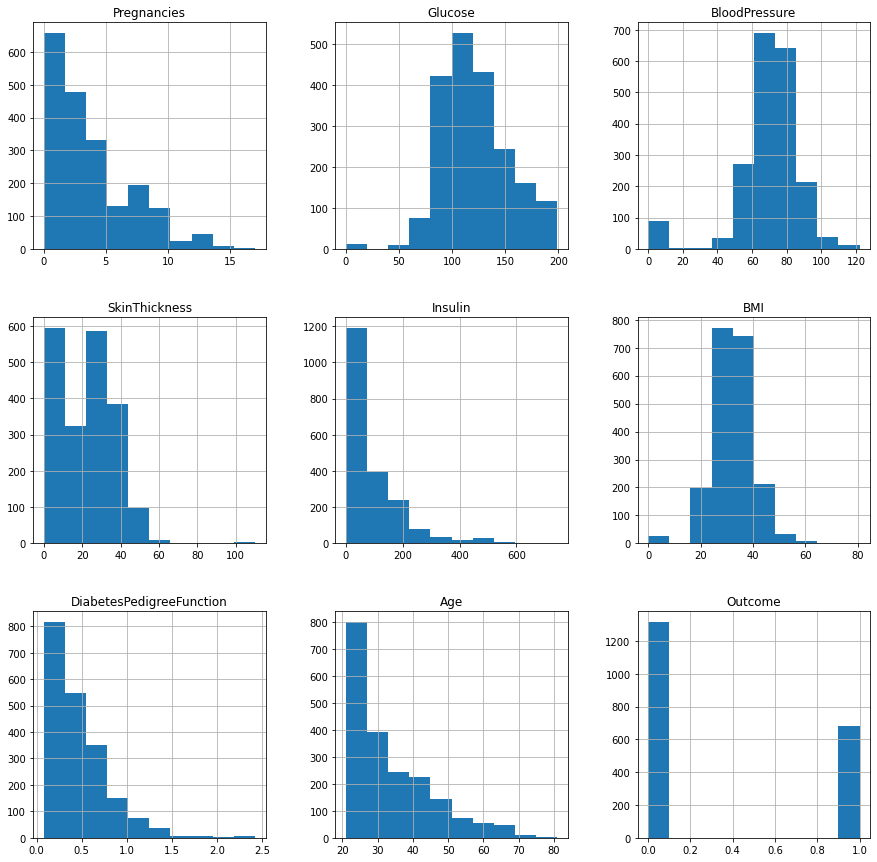

In [11]:
df.hist(figsize =(15,15))

# Model Building

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [16]:
y_pred = rf.predict(X_test)

# Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [18]:
score

0.972

In [19]:
cm

array([[328,   6],
       [  8, 158]], dtype=int64)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       334
           1       0.96      0.95      0.96       166

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



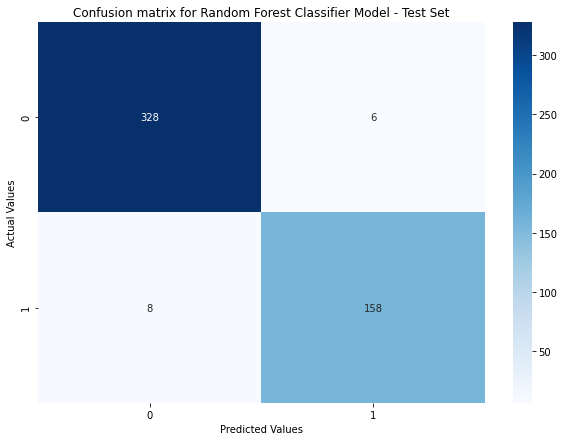

In [21]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Hypremarameter Tuning

In [22]:
# Hyperparameter tuning the RandomForestClassifier
n_estimators = 0
best_accuracy = 0.0
for i in np.arange(1,100,1):
    temp_Classifier = RandomForestClassifier(n_estimators=i,random_state=0)
    temp_Classifier.fit(X_train,y_train)
    temp_y_pred=temp_Classifier.predict(X_test)
    score = accuracy_score(y_test,temp_y_pred)
    print('Accurecy score for n_estimators = {} is {}'.format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        n_estimators = i
print('The Best value of n_estimators is {} for which Accuracy is {}'.format(n_estimators,best_accuracy*100))

Accurecy score for n_estimators = 1 is 87.4
Accurecy score for n_estimators = 2 is 89.0
Accurecy score for n_estimators = 3 is 93.2
Accurecy score for n_estimators = 4 is 91.6
Accurecy score for n_estimators = 5 is 95.2
Accurecy score for n_estimators = 6 is 93.6
Accurecy score for n_estimators = 7 is 94.8
Accurecy score for n_estimators = 8 is 94.4
Accurecy score for n_estimators = 9 is 95.2
Accurecy score for n_estimators = 10 is 94.6
Accurecy score for n_estimators = 11 is 97.0
Accurecy score for n_estimators = 12 is 96.0
Accurecy score for n_estimators = 13 is 96.2
Accurecy score for n_estimators = 14 is 96.6
Accurecy score for n_estimators = 15 is 96.6
Accurecy score for n_estimators = 16 is 96.8
Accurecy score for n_estimators = 17 is 96.6
Accurecy score for n_estimators = 18 is 96.6
Accurecy score for n_estimators = 19 is 97.2
Accurecy score for n_estimators = 20 is 97.2
Accurecy score for n_estimators = 21 is 97.2
Accurecy score for n_estimators = 22 is 96.8
Accurecy score for 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=85, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [24]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [25]:
score

0.988

In [26]:
cm

array([[332,   2],
       [  4, 162]], dtype=int64)

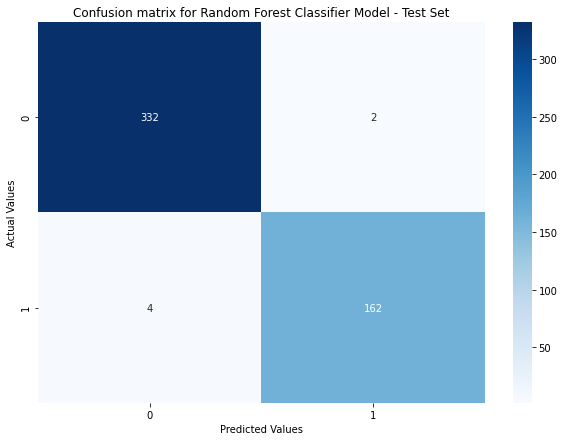

In [27]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Prediction

In [28]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)
    
    return (rf.predict(x))

In [29]:
def prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    if predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
      print('Oops! You have diabetes.')
    else:
      print("Great! You don't have diabetes.")

In [30]:
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction(1, 117, 88, 24, 145, 34.5, 0.403, 40)

Oops! You have diabetes.


In [31]:
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction(2, 81, 72, 15, 76, 30.1, 0.547, 25)

Great! You don't have diabetes.
